# Day 17

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

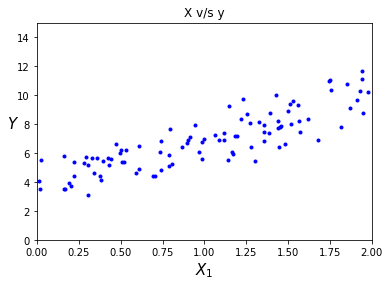

In [7]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X,y,"b.")
plt.xlabel ("$X_1$", fontsize=15)
plt.ylabel ("$Y$", rotation =0, fontsize=15)
plt.axis([0,2,0,15])
plt.title("X v/s y")
plt.savefig("linearPlot")

In [8]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.82984668]
 [3.05181475]]


In [9]:
# Now we make prediction using theta
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((len(X_new),1)),X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[3.82984668]
 [9.93347618]]


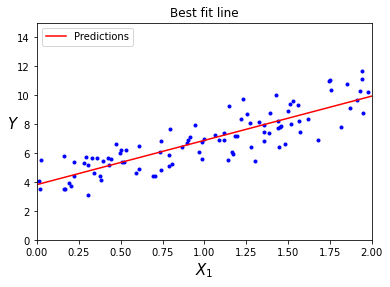

In [10]:
# Plotting the model
plt.plot(X,y,"b.")
plt.plot(X_new,y_predict, "r-", label = "Predictions")
plt.xlabel ("$X_1$", fontsize=15)
plt.ylabel ("$Y$", rotation =0, fontsize=15)
plt.axis([0,2,0,15])
plt.title("Best fit line")
plt.legend(loc="upper left")
plt.savefig("bestfitLine")

In [74]:
# Performing Linear regression with Scikit library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_)
print(lin_reg.coef_)


[3.86671814]
[[3.03691204]]


In [75]:
# Predicting the value via the linear regression model
lin_reg.predict(X_new)

array([[3.86671814],
       [9.94054222]])

In [80]:
# Deriving Theta values from lstq function
theta_best_svd, residual, rank,s  = np.linalg.lstsq(X_b, y, rcond = 1e-6)
print(theta_best_svd)

[[3.86671814]
 [3.03691204]]


In [83]:
# Deriving theta value using Moore-penrose inverse
theta_best_new = np.linalg.pinv(X_b).dot(y)
print(theta_best_new)

[[3.86671814]
 [3.03691204]]


# Day 18

[[3.84433243]
 [3.06670212]]


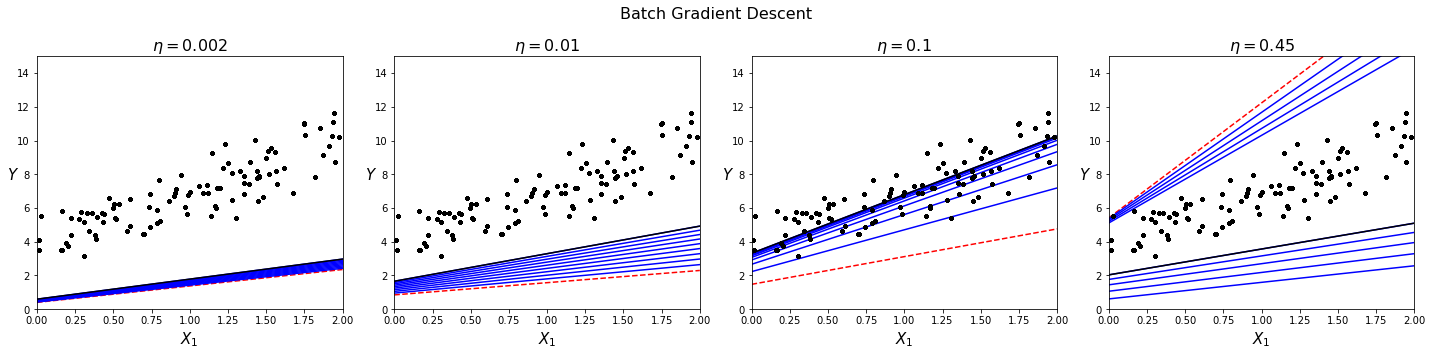

In [111]:
# Batch Gradient Descent
np.random.seed(42)
lr = 0.1
n_iteration = 1000
m = 100
    
def getVal(theta_best):
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((len(X_new),1)),X_new]
    y_predict = X_new_b.dot(theta_best)
    return X_new, y_predict

def plot_gradient_descent(learn):
    theta = np.random.rand(2,1)
    for i in range(n_iteration):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learn*gradients
        plt.plot(X, y, "k.")
        if (i < 10):
            X_new,y_predict = getVal(theta)
            style = "b-" if i>0 else "r--"
            plt.plot(X_new,y_predict, style)
        if (i == 999):
            plt.plot(X_new,y_predict, "k-")
        plt.xlabel ("$X_1$", fontsize=15)
        plt.ylabel ("$Y$", rotation =0, fontsize=15)
        plt.axis([0,2,0,15])
        plt.title(f"$\eta = {learn}$", fontsize=16)
        

learn = [0.002,0.01,0.1,0.45]
val = 141
plt.figure(figsize=(20,5))
plt.ylabel("$y$", rotation=0, fontsize=18)
for lr in learn:
    plt.suptitle("Batch Gradient Descent",fontsize=16)
    plt.subplot(val);plot_gradient_descent(lr)
    plt.tight_layout()
    val=val+1

plt.savefig("batch")
print(theta)
    

[[3.84433243]
 [3.06670212]]


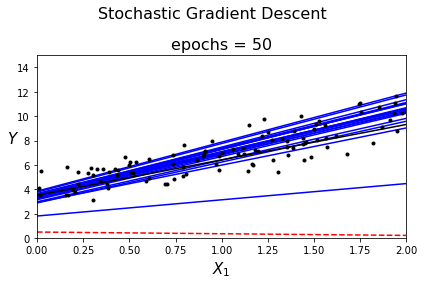

In [112]:
# Stochastic Gradient Descent

np.random.seed(42)
epochs=50
theta = np.random.randn(2,1)
m = 100
t0=5
t1=50

def learning_schedule(t):
    return t0 / (t + t1)
    
for ep in range(epochs):
    for i in range(m):
        if (ep == 0 and i<20):
            y_predict = X_new_b.dot(theta)
            style = "b-" if i>0 else "r--"
            plt.plot(X_new,y_predict, style)
        if (ep == 0 and i==99):
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict, "k-")
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(ep*m +i)
        theta = theta - lr * gradients

plt.plot(X, y, "k.")
plt.suptitle("Stochastic Gradient Descent",fontsize=16) 
plt.xlabel ("$X_1$", fontsize=15)
plt.ylabel ("$Y$", rotation =0, fontsize=15)
plt.axis([0,2,0,15])
plt.title(f"epochs = {epochs}", fontsize=16)
plt.tight_layout()
plt.savefig("stochastic")
print(theta)